<a href="https://colab.research.google.com/github/Abdulaziz-Sherif/Datathon-4/blob/main/datathon4_Ashley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io

name = "datathon4"
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[f'{name}.csv']))
df.head()

KeyboardInterrupt: ignored

In [ ]:
#import libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_rows', None)
missing_value_counts = df.isnull().sum()
missing_value_counts

In [ ]:
selected_columns = ['hospital_death', 'age', 'gender', 'bmi', 'aids', 'cirrhosis',
                    'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
                    'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
df1 = df[selected_columns]
df1.head()

NameError: ignored

In [ ]:
print(df1.shape)

(91713, 12)


In [ ]:
print(df1.isnull().sum())

hospital_death                    0
age                            4228
gender                           25
bmi                            3429
aids                            715
cirrhosis                       715
diabetes_mellitus               715
hepatic_failure                 715
immunosuppression               715
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
dtype: int64


In [ ]:
#fill na with median value
df1['age'].fillna(df['age'].median(), inplace=True)
df1['bmi'].fillna(df['bmi'].median(), inplace=True)

In [ ]:
#drop the row of containing null binary variable
df1.dropna(subset=['gender'], inplace=True)
df1.dropna(subset=['aids'], inplace=True)

In [ ]:
print(df1.isnull().sum())
print(df1.shape)

hospital_death                 0
age                            0
gender                         0
bmi                            0
aids                           0
cirrhosis                      0
diabetes_mellitus              0
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
dtype: int64
(90973, 12)


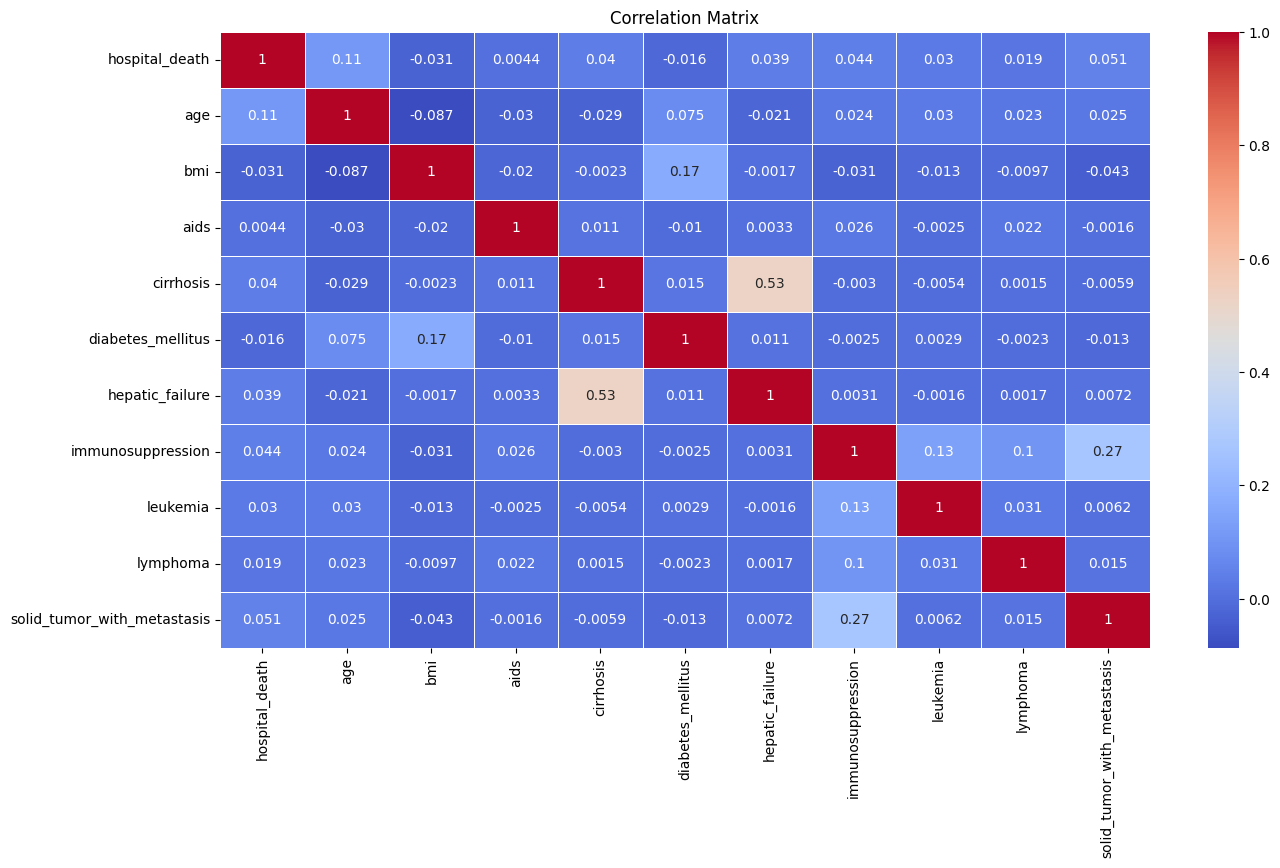

In [ ]:
correlations = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

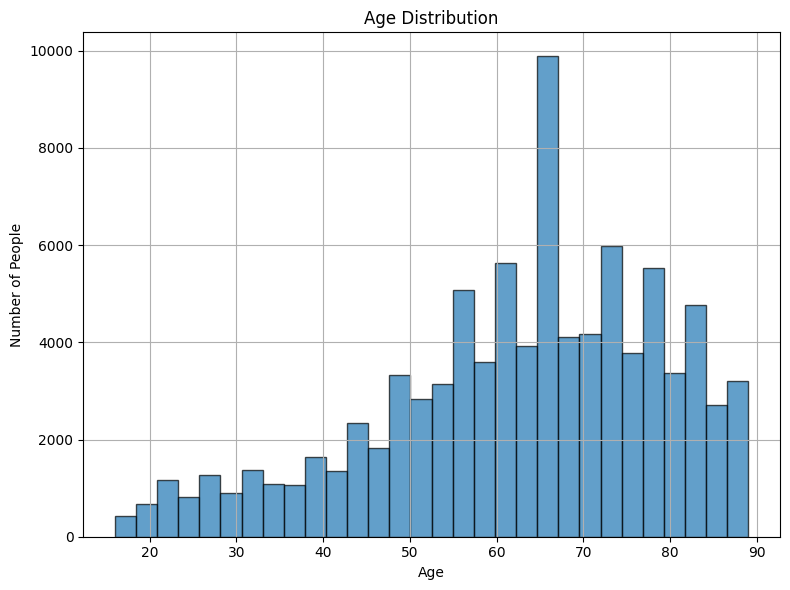

In [ ]:
#histogram for age

plt.figure(figsize=(8, 6))
plt.hist(df1['age'], bins=30, edgecolor='black', alpha=0.7)

# Title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Function to create bar plots for categorical variables
def create_barplot(dataset, cat_var):
  # create a new dataframe to store counts of observations in each group
  cat_counts = dataset.groupby(cat_var).size().reset_index(name='Count')

# plot data
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.barplot(x=cat_counts[cat_var],
            y=cat_counts['Count'],
            ax=ax).set(title=f'Observation Count among {cat_var}')

  ax.bar_label(ax.containers[0], label_type='edge')
  ax.tick_params(axis='x', rotation=45)

  ax.margins(y=0.1)

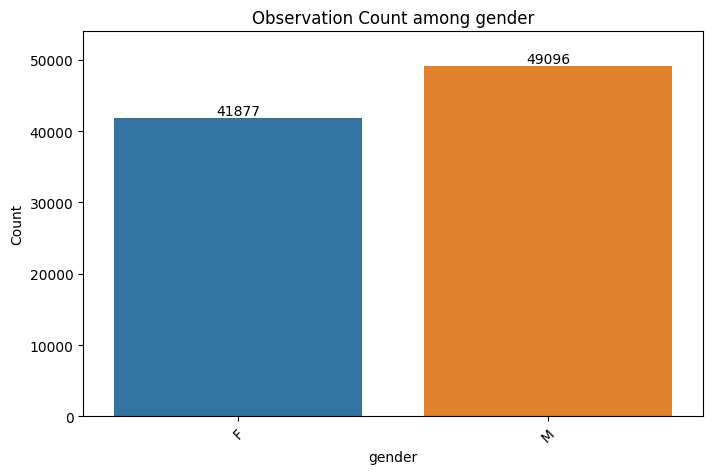

In [ ]:
# Bar plots for gender
create_barplot(df1, 'gender')

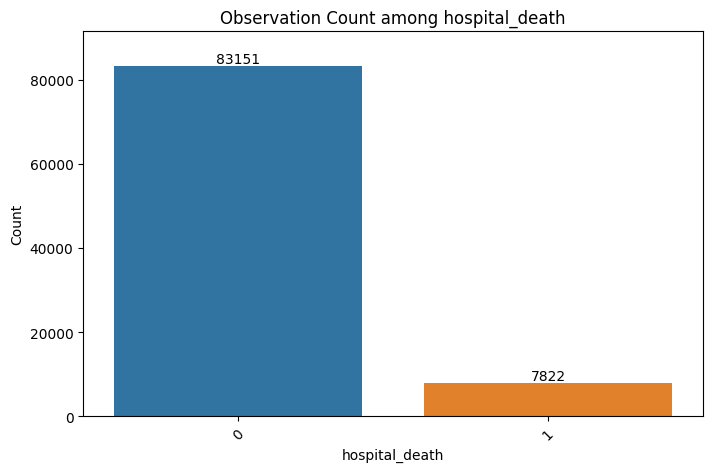

In [ ]:
# Bar plots for hospital death
create_barplot(df1, 'hospital_death')

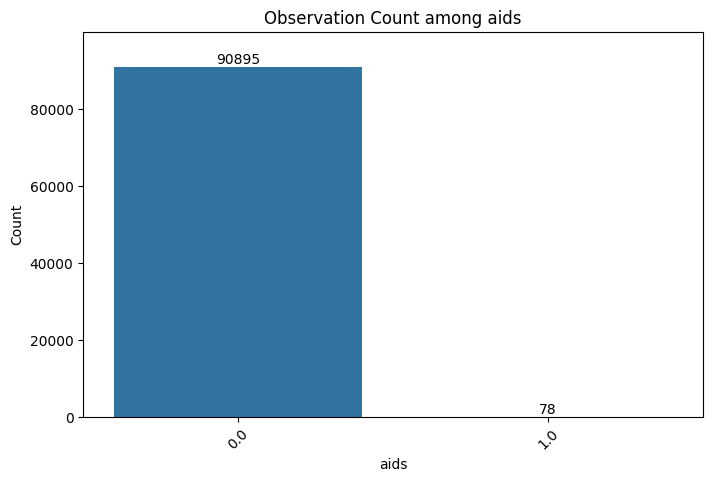

In [ ]:
# Bar plots for hospital death
create_barplot(df1, 'aids')

In [ ]:
print(df1.dtypes)

hospital_death                   int64
age                            float64
gender                          object
bmi                            float64
aids                           float64
cirrhosis                      float64
diabetes_mellitus              float64
hepatic_failure                float64
immunosuppression              float64
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
dtype: object


In [ ]:
#encoding sex to 0 and 1
sex_mapping = {'F': 0, 'M': 1}
df1['gender'] = df1['gender'].map(sex_mapping)

[[16502   124]
 [ 1547    22]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     16626
           1       0.15      0.01      0.03      1569

    accuracy                           0.91     18195
   macro avg       0.53      0.50      0.49     18195
weighted avg       0.85      0.91      0.87     18195



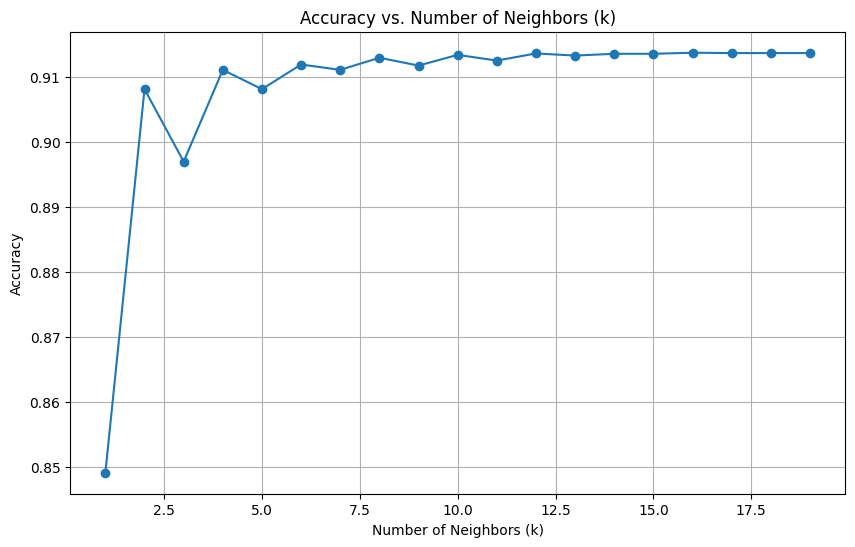

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
X = df1.drop(['hospital_death'], axis=1)
y = df1['hospital_death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 20):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

NameError: ignored